# Titanic - Kaggle

O objetivo deste notebook é estudar em linhas gerais o desafio do `Titanic` no site [kaggle](https://www.kaggle.com/c/titanic).

Será apresentado conceitos básicos relacionados a `Data Science`, de maneira que seja possível entender - principalmente - para os iniciantes e um autoestudo sobre como tratar problemas desse tipo.

# O que será feito?

Basicamente, essa `checklist` abaixo é o `ciclo de vida` de todos os problemas de machine learning, assim, a ideia é seguir esses passos para que seja transparente o que está sendo feito.

    1. Definição do Problema
    2. Obtenção dos Dados
    3. Exploração dos Dados
    4. Preparação dos Dados
    5. Construção do Modelo
    6. Avaliação

## 1. Definição do Problema

O `Titanic` é uma das histórias mais tristes da modernidade, em que o seu naufrágio **matou 1502 pessoas de um total de 2224 passageiros**.

Assim, com os dados `reais` disponibilizados, tem-se como objetivo realizar uma analíse exploratória (descobrindo as variáveis que tiveram uma maior influência na probabilidade de sobrevivência) e criar um modelo preditivo para "medir" a chance de sobrevivência dos passageiros do Titanic.

## 2. Obtenção dos dados

Os dados são disponibilizados pela plataforma [kaggle](https://www.kaggle.com/c/titanic). Assim, tem-se dois datasets:

- O primeiro é formado pelos dados de treino `(train.csv)`.
- O segundo é formado pelos dados de teste `(teste.csv)`.

É interessante destacar, que os dados de treino são utilizados para construir o modelo de *machine learning* supervisionado, nele é informado se os pacientes sobreviveram ou não. Em contrapartida, o dataset de teste é um conjunto de dados nunca vistos pelo modelo, assim não é informado se os pacientes sobrevieram/não.

### Importando as bibliotecas

Na célula abaixo será importado todas as bibliotecas utilizadas no problema.

In [1]:
# importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir que o pandas exiba todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
%matplotlib inline

### Importando os dados

In [2]:
# dataframe de treino
df_train = pd.read_csv("../datasets/train.csv")

# dataframe de teste
df_test = pd.read_csv("../datasets/test.csv")

## 3. Exploração dos dados

É fundamental conhecer os dados e principalmente entender sua estruturação. Assim, além de entender cada coluna do dataset e suas possíveis relações, temos que traçar estratégias que nos auxiliam em transformar os dados brutos em dados limpos.

In [3]:
df_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### Entendendo as colunas

O primeiro passo pode ser entender cada coluna do dataset:

- `PassengerId`: número de identificação do passageiro.
- `Survived`: informa se o passageiro sobreviveu (1) ou não (0).
- `PClass`: classe do bilhete (1, 2 e 3 classes).
- `Name`: nome do passageiro.
- `Sex`: sexo do passageiro.
- `Age`: idade do passageiro.
- `SibSp`: quantidade de cônjuges e irmãos a bordo.
- `Parch`: quantidade de pais e filhos a bordo.
- `Ticket`: número de identificação da passagem.
- `Fare`: preço da passagem.
- `Cabin`: número da cabine do passageiro.
- `Embarked`: porto no qual o passageiro embarcou no navio (S, C ou Q)

### Entendendo os tipos de cada variável

Após isso, é interessante entendermos os tipos de cada variável:

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Assim, temos a seguinte conclusão:

- `variáveis categóricas`: Name, Sex, Ticket, Cabin, Embarked.
- `variáveis númericas (discretas)`: Pclass, SibSp, Parch.
- `variáveis númericas (contínuas)`: Age, Fare.
- `identificador`: PassengerId.
- `classe alvo`: Survived.

### Qual o formato do nosso dataset?

In [5]:
# obtenho a quantidade de linhas e colunas
linhas, colunas = df_train.shape

print(f'Nosso dataset possui {linhas} linhas e {colunas} colunas.')

Nosso dataset possui 891 linhas e 12 colunas.


### Quais são os valores faltantes?

In [6]:
# obtenho quais são os valores nulos e somo, isso retorna uma pd.Series
faltantes = df_train.isnull().sum()

# calculo a porcentagem e já ordeno de maneira ascendente
porcentagem_faltantes = faltantes / linhas
porcentagem_faltantes.sort_values(ascending=False, inplace=True)

# percorro os items e salvo em um array para exibir
atributos_faltantes = []
for atribute, value in porcentagem_faltantes.iteritems():
    if value > 0:
        atributos_faltantes.append(atribute)
        
print(f'As caractéristicas relacionadas a {atributos_faltantes} devem ser tratadas.')

As caractéristicas relacionadas a ['Cabin', 'Age', 'Embarked'] devem ser tratadas.


### Como é a distribuição estatística dos dados?

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


É interessante destacar, que o método `describe()` também pode ser utilizado para estatísica descritiva em colunas que não são números, pode-se utilizar o argumento `include=['O']`.

In [8]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Leary, Miss. Hanora ""Norah""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


- Pode-se perceber que a variável `Name` é unica. 
- A maior quantidade de pessoas é do `sexo masculino`.
- O porto que mais embarcou pessoas foi o denominado `S`.

### Quais foram os grupos de quem sobreviveu?

Uma maneira para entender os dados é analisar a probabilidade de sobrevivência pelo sexo, pode-se observar que o sexo feminino obteve uma sobrevivência considerável.

In [9]:
nome_atributo = 'Sex'
nome_classe_real = 'Survived'

df_train[[nome_atributo, nome_classe_real]].groupby([nome_atributo]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Pode-se analisar a relação da classe real com os demais atributos também, porém aqui vamos apenas analisar do sexo.

### Como os dados se correlacionam?

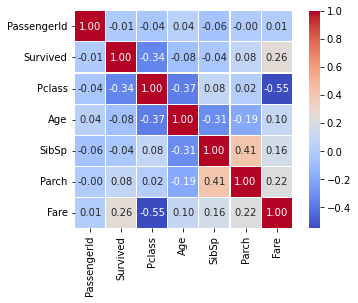

In [10]:
# plotando a matriz de correlação
sns.heatmap(df_train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

## 4. Preparando os dados

Agora, os dados serão preparados, assim seguiremos a seguinte lógica:

- Remover/Selecionar as features.
- Tratar os valores faltantes.
- Tratar a difenreça entre as variáveis categóricas e numéricas.

Primeiramente, como os datasets de treino e teste estão separados, vamos juntá-los com o objetivo de facilitar as transformações.

In [11]:
# salvando as dimensões anteriores
idx_train = df_train.shape[0]
idx_test = df_test.shape[0]

# variáveis que serão utilizadas na modelagem
passenger_id = df_test['PassengerId']
target = df_train.Survived.copy()

# concatenando os datasets
df_titanic_merged = pd.concat(objs=[df_train, df_test], axis=0, sort=True).reset_index(drop=True)
df_titanic_merged

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


Agora, iremos remover as variáveis `PassengerId, Name, Ticket e Cabin` pois, de maneira analítica, não parecem relevantes para o problema. Também, vamos `dropar` a variável target.

In [12]:
df_titanic_merged.drop(['PassengerId', 'Ticket', 'Cabin', 'Name', 'Survived'], axis='columns', inplace=True)

In [13]:
print(f'Apenas as variáveis {df_titanic_merged.columns.tolist()} serão utilizadas.')

Apenas as variáveis ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'] serão utilizadas.


Agora, vamos preencher os valores faltantes (nulos) encontrados anteriormente. Dessa maneira, a estratégia utilizada será de preencher esses valores arbitrariamente (aqui no caso com a média), sendo que pode ser pelo valor mais frequente, mediana e etc.

In [14]:
# age
age_mediam = df_titanic_merged['Age'].median()
df_titanic_merged['Age'].fillna(age_mediam, inplace=True)

# fare
fare_mediam = df_titanic_merged['Fare'].median()
df_titanic_merged['Fare'].fillna(fare_mediam, inplace=True)

# embarked
embarked_top = df_titanic_merged['Embarked'].value_counts()[0]
df_titanic_merged['Embarked'].fillna(embarked_top, inplace=True)

Por fim, vamos realizar as tranformações das variáveis categórias para numéricas. Isso é necessário pois o modelo matématico exige que trabalhemos com variáveis baseadas em números.

Assim, a variável `Sex` será mapeada para `0 ou 1` equanto a variável `Embarked` será utilizada o conceito de variáveis `dummies`.

In [15]:
# mapeando a variável Sex para zero ou um
df_titanic_merged['Sex'] = df_titanic_merged['Sex'].map({'male': 0, 'female': 1})

# transformando a variável Embarked pela técnica dummies
embarked_dummies = pd.get_dummies(df_titanic_merged['Embarked'], prefix='Embarked')
df_titanic_merged = pd.concat(objs=[df_titanic_merged, embarked_dummies], axis='columns')
df_titanic_merged.drop(['Embarked'], axis='columns', inplace=True)

In [16]:
df_titanic_merged.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,0,1,0,0,0,1
1,38.0,71.2833,0,1,1,1,0,1,0,0
2,26.0,7.9250,0,3,1,0,0,0,0,1
3,35.0,53.1000,0,1,1,1,0,0,0,1
4,35.0,8.0500,0,3,0,0,0,0,0,1


Por fim, iremos recuperar o dataset em treino e teste, assim como estava inicialmente.

In [17]:
df_train = df_titanic_merged.iloc[:idx_train]
df_test = df_titanic_merged.iloc[idx_train:]

## 5. Criando o modelo

É nitido que a "energia" mais gasta foi durante o processo de analise e tratamento dos dados. Todo esse cuidado é fundamental para que entendamos o problema e descartemos dados redundantes, duplicados e desnecessários. Agora, com poucas linhas de código, iremos implementar o modelo de aprendizado de máquina.

In [18]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# criar um modelo de Regressão Logística e realizar o treinamento
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df_train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(df_train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

# criar um modelo de árvore de decisão e realizar o treinamento
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(df_train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(df_train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Regressão Logística: 80.13
Acurácia do modelo de Árvore de Decisão: 82.72


Agora, por fim, iremos criar a submissão para a plataforma do `Kaggle`.

In [19]:
y_pred_tree = tree_model.predict(df_test)

submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)